In [1]:
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from matplotlib.ticker import PercentFormatter
from math import radians

import warnings
warnings.filterwarnings('ignore')

In [2]:
chapman = pd.read_csv('../data/aroldis-chapman.csv')
chapman.drop(columns = ['Unnamed: 0'], inplace = True)

# Font Dictionary
font_title = {
    'size': 12,
    'weight': 'bold',
    'verticalalignment': 'center_baseline',
    'horizontalalignment': 'center'
}

pd.set_option('max_columns', None)
print(chapman.shape)
chapman.head(2)

(1004, 89)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,is_strike,pitch_count,plate_-x,pfx_-x,swing_miss
0,FS,2021-10-03,90.3,0.44,6.02,"Chapman, Aroldis",622534,547973,strikeout,swinging_strike,14,Manuel Margot strikes out swinging.,R,R,L,NYY,TB,S,2.0,NaN,1,2,2021,0.96,-0.36,0.51,0.66,NaN,621563.0,NaN,2,9,Top,NaN,NaN,596142,-1.903668,-131.352709,-7.453969,11.483609,27.102552,-31.191605,3.32,1.51,NaN,NaN,NaN,92.2,479.0,7.4,632239,547973,596142,519203,650402,596059,623205,608336,458731,592450,53.10,NaN,NaN,0.0,1.0,0.0,0.0,NaN,62,5,Split-Finger,0,0,0,0,0,0,0,0,Standard,Standard,96.0,0.104,-0.213,1,1-2,-0.51,-11.52,1
1,FS,2021-10-03,89.9,0.45,6.08,"Chapman, Aroldis",622534,547973,NaN,foul,12,Manuel Margot strikes out swinging.,R,R,L,NYY,TB,S,NaN,NaN,1,2,2021,0.88,-2.16,0.94,2.59,NaN,621563.0,NaN,2,9,Top,NaN,NaN,596142,-0.666100,-130.957640,-2.285423,10.195010,29.784284,-33.975413,3.32,1.51,182.0,70.6,40.0,91.8,585.0,7.5,632239,547973,596142,519203,650402,596059,623205,608336,458731,592450,52.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,4,Split-Finger,0,0,0,0,0,0,0,0,Standard,Standard,47.0,0.000,0.000,1,1-2,-0.94,-10.56,0


In [3]:
spin_axis = chapman.groupby(['pitch_type']).mean()
spin_axis

,release_speed,release_pos_x,release_pos_z,batter,pitcher,zone,hit_location,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp,is_strike,plate_-x,pfx_-x,swing_miss
pitch_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FF,98.277680,0.615694,6.085589,604314.581722,547973.0,8.629174,4.873418,0.871705,0.643234,2021.0,0.341072,18.055255,-0.079227,2.440615,627594.744186,618571.000000,617313.050314,0.903339,9.015817,124.602500,114.477167,582946.625659,-2.727381,-142.898516,-8.010697,5.317270,33.337900,-9.902637,3.383603,1.568401,187.483444,82.874172,25.086093,99.542707,2372.955986,7.157746,633359.240773,547973.0,582946.625659,546337.546573,576880.667838,571760.189807,640086.790861,585719.260105,520138.224956,601200.671353,53.343831,0.372867,0.480233,0.452609,0.991304,0.173913,0.217391,3.533333,71.646749,2.564148,3.242531,3.838313,2.711775,4.369069,3.850615,3.249561,2.731107,4.369069,156.109155,-0.008961,0.006880,0.606327,0.079227,-4.092865,0.115993
FS,88.379279,0.419640,6.114505,601991.486486,547973.0,11.063063,2.718750,0.558559,1.486486,2021.0,0.223874,-2.695135,0.345045,1.754234,642162.000000,625008.875000,603099.266667,1.171171,9.027027,131.504000,122.612000,584718.648649,-0.676561,-128.628067,-4.133280,2.612906,28.002414,-33.913574,3.376216,1.559820,137.944444,77.535294,1.352941,89.992793,786.900901,7.381982,633201.369369,547973.0,584718.648649,547585.792793,584415.297297,567521.270270,634646.783784,589777.036036,505856.738739,593939.432432,53.118649,0.580600,0.536000,0.048485,1.000000,0.030303,0.000000,3.400000,71.180180,3.225225,3.063063,3.882883,2.594595,4.351351,3.882883,3.063063,2.594595,4.351351,117.009009,-0.005243,-0.037486,0.603604,-0.345045,-2.686486,0.360360
SI,100.651786,0.535893,6.108393,598559.035714,547973.0,8.642857,3.071429,0.571429,1.910714,2021.0,1.082857,16.032857,0.144643,2.276429,NaN,625295.777778,633961.571429,1.250000,9.000000,145.233750,139.217500,581034.500000,-3.711751,-146.313325,-8.569028,16.425865,35.022157,-11.136346,3.402857,1.566250,134.352941,85.717647,9.000000,102.021429,2393.428571,7.125000,633546.821429,547973.0,581034.500000,549182.714286,573352.660714,576289.125000,643944.839286,571722.785714,519206.321429,600757.107143,53.381607,0.256500,0.253750,0.000000,1.000000,0.000000,0.000000,2.375000,71.553571,3.750000,3.196429,3.678571,2.803571,4.071429,3.678571,3.196429,2.803571,4.071429,160.017857,-0.006196,-0.063179,0.696429,-0.144643,-12.994286,0.285714
SL,85.065299,0.499142,6.177537,609493.902985,547973.0,9.548507,4.019608,1.399254,0.988806,2021.0,-1.053246,2.279552,-0.111679,1.924291,602457.028571,612826.523810,608955.679612,0.973881,8.988806,107.326562,133.205000,585290.369403,0.690050,-123.819130,-4.106076,-10.925371,25.619038,-29.558741,3.356082,1.550672,115.879310,77.554386,9.824561,86.251493,2276.473881,7.317603,633330.753731,547973.0,585290.369403,542666.514925,572384.854478,570738.742537,639487.205224,597993.257463,511959.634328,598921.675373,53.181791,0.258781,0.366875,0.313077,0.984615,0.092308,0.153846,2.906250,71.690299,3.511194,3.544776,3.641791,2.783582,4.402985,3.667910,3.555970,2.820896,4.402985,293.750000,-0.003537,-0.000060,0.593284,0.111679,12.638955,0.175373


In [4]:
r_chapman = chapman.loc[chapman['stand'] == 'R']
l_chapman = chapman.loc[chapman['stand'] == 'L']

ff = chapman.loc[chapman['pitch_type'] == 'FF']
sl = chapman.loc[chapman['pitch_type'] == 'SL']
# Split-Finger
fs = chapman.loc[chapman['pitch_type'] == 'FS']
si = chapman.loc[chapman['pitch_type'] == 'SI']


r_ff = chapman.loc[(chapman['pitch_type'] == 'FF') & (chapman['stand'] == 'R')]
r_sl = chapman.loc[(chapman['pitch_type'] == 'SL') & (chapman['stand'] == 'R')]
r_fs = chapman.loc[(chapman['pitch_type'] == 'FS') & (chapman['stand'] == 'R')]
r_si = chapman.loc[(chapman['pitch_type'] == 'SI') & (chapman['stand'] == 'R')]

l_ff = chapman.loc[(chapman['pitch_type'] == 'FF') & (chapman['stand'] == 'L')]
l_sl = chapman.loc[(chapman['pitch_type'] == 'SL') & (chapman['stand'] == 'L')]
l_fs = chapman.loc[(chapman['pitch_type'] == 'FS') & (chapman['stand'] == 'L')]
l_si = chapman.loc[(chapman['pitch_type'] == 'SI') & (chapman['stand'] == 'L')]

# Pitcher Overview

### Pitch Usage

In [5]:
chapman.pitch_type.value_counts(normalize=True)

FF    0.566733
SL    0.266932
FS    0.110558
SI    0.055777
Name: pitch_type, dtype: float64

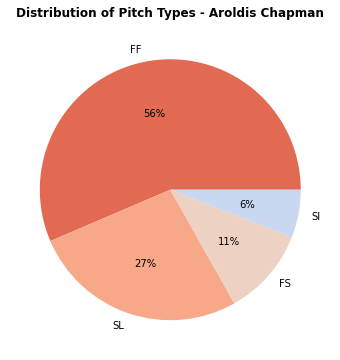

In [6]:
plt.figure(figsize = (8, 6))

dist = round(chapman.pitch_type.value_counts(normalize = True), 2)
labels = ['FF', 'SL', 'FS', 'SI']
color = sns.color_palette('coolwarm_r')

plt.pie(dist, labels = labels, colors = color, autopct = '%.0f%%')
plt.title('Distribution of Pitch Types - Aroldis Chapman', fontdict = font_title, pad = 15);

### Pitch Usage by Batter Handedness

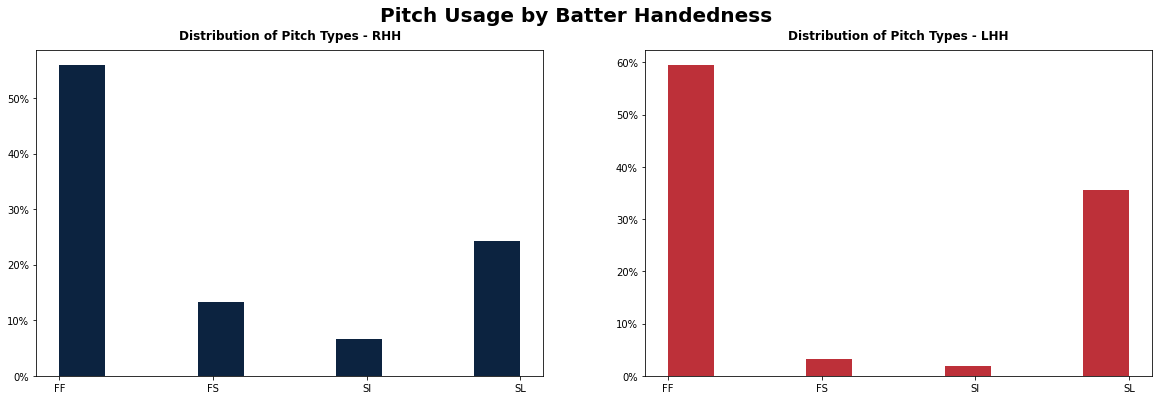

In [7]:
red = '#BD3039'
blue = '#0C2340'
fig, axs = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Pitch Usage by Batter Handedness', fontsize = 20, fontweight = 'bold')

dist_r = r_chapman.pitch_type.sort_values()
axs[0].hist(dist_r, weights = np.ones(len(dist_r)) / len(dist_r), color = blue)
axs[0].yaxis.set_major_formatter(PercentFormatter(1))
axs[0].set_title('Distribution of Pitch Types - RHH', fontdict = font_title, pad = 15)

dist_l = l_chapman.pitch_type.sort_values()
axs[1].hist(dist_l, weights = np.ones(len(dist_l)) / len(dist_l), color = red)
axs[1].yaxis.set_major_formatter(PercentFormatter(1))
axs[1].set_title('Distribution of Pitch Types - LHH', fontdict = font_title, pad = 15);

FF velo sits: 97 - 99 mph,  max: 102.4 mph
SL velo sits: 84 - 86 mph,  max: 89.2 mph
FS velo sits: 88 - 89 mph,  max: 92.2 mph
SI velo sits: 100 - 102 mph,  max: 103.4 mph


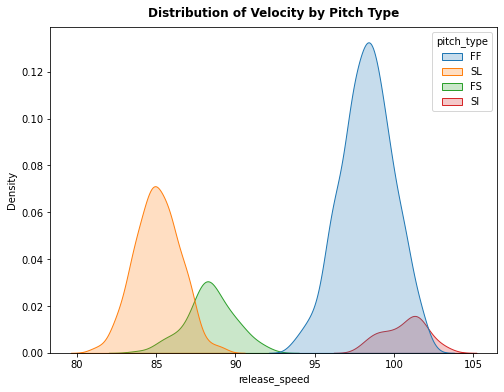

In [8]:
plt.figure(figsize = (8, 6))

sns.kdeplot(data = chapman, x = 'release_speed', shade = 'fill', 
            multiple = 'layer', hue = 'pitch_type', 
            hue_order = ['FF', 'SL', 'FS', 'SI'], 
            palette = 'tab10')
plt.title('Distribution of Velocity by Pitch Type', fontdict = font_title, pad = 15);

print('FF velo sits:', round(ff['release_speed'].quantile(.25)), '-', round(ff['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(ff['release_speed'].max(), 2), 'mph')
print('SL velo sits:', round(sl['release_speed'].quantile(.25)), '-', round(sl['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(sl['release_speed'].max(), 2), 'mph')
print('FS velo sits:', round(fs['release_speed'].quantile(.25)), '-', round(fs['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(fs['release_speed'].max(), 2), 'mph')
print('SI velo sits:', round(si['release_speed'].quantile(.25)), '-', round(si['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(si['release_speed'].max(), 2), 'mph')

### Release Postion
- from hitters' perspective

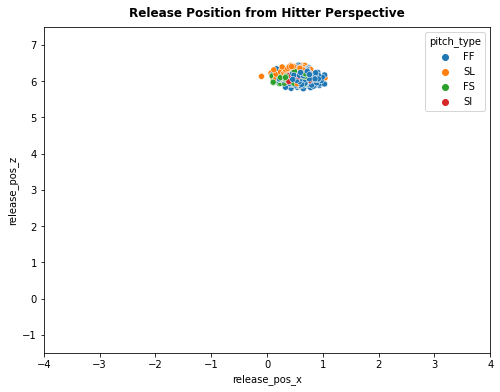

In [9]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = chapman, x = 'release_pos_x', y = 'release_pos_z', hue = 'pitch_type', 
                hue_order = ['FF', 'SL', 'FS', 'SI'], palette = 'tab10')
plt.xlim(-4, 4)
plt.ylim(-1.5, 7.5)
plt.title('Release Position from Hitter Perspective', fontdict = font_title, pad = 15);

# Pitcher Stuff

### Velocity & Spin Rate by Pitch Type

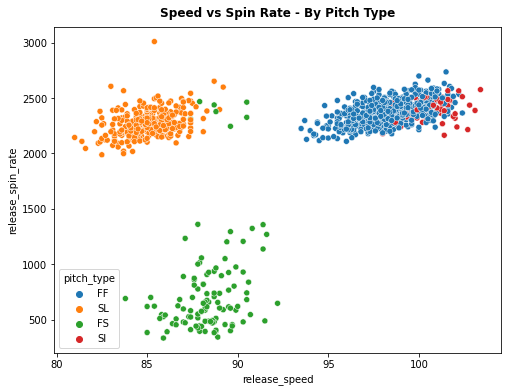

In [10]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = chapman, x = 'release_speed', y = 'release_spin_rate', hue = 'pitch_type', 
                hue_order = ['FF', 'SL', 'FS', 'SI'], palette = 'tab10')
plt.title('Speed vs Spin Rate - By Pitch Type', fontdict = font_title, pad = 15);

### Spin Axis

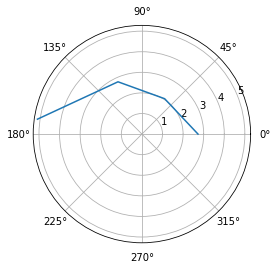

In [11]:
ax = plt.subplot(polar = True)

ax.plot([radians(x) for x in spin_axis['spin_axis'].values]);

### Horizontal & Vertical Break Axis

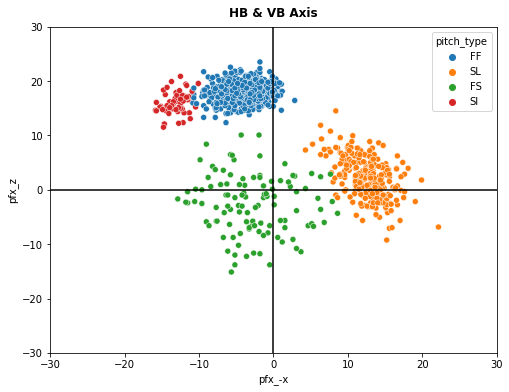

In [12]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = chapman, x = 'pfx_-x', y = 'pfx_z', hue = 'pitch_type', 
                hue_order = ['FF', 'SL', 'FS', 'SI'], palette = 'tab10')
plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.title('HB & VB Axis', fontdict = font_title, pad = 15);

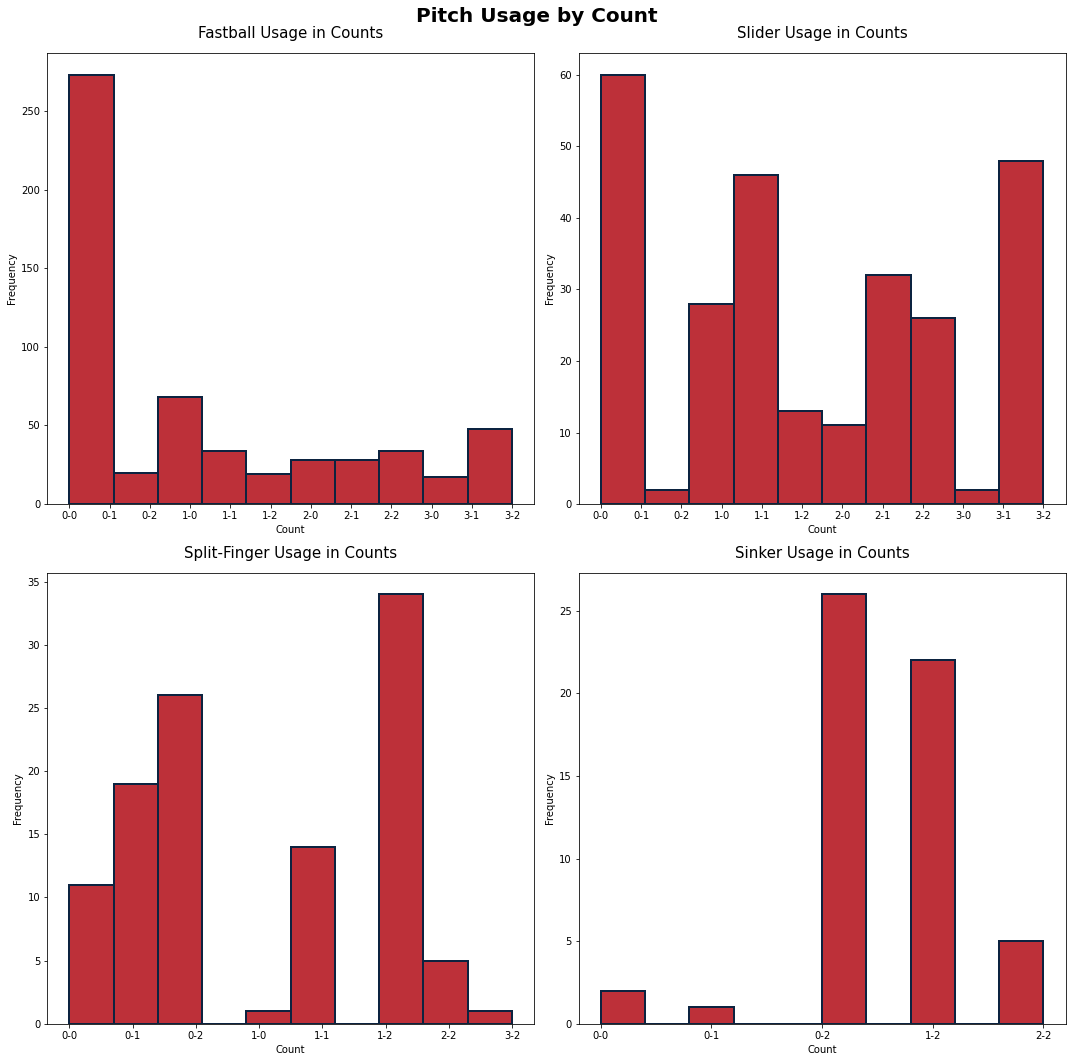

In [13]:
fig, axs = plt.subplots(2, 2, figsize = (15, 15))
fig.suptitle('Pitch Usage by Count', fontsize = 20, fontweight = 'bold')
plt.setp(axs[0:, :], xlabel = 'Count')
plt.setp(axs[:, 0:], ylabel = 'Frequency')

axs[0][0].hist(ff['pitch_count'].sort_values(ascending = True), color = red, edgecolor = blue, linewidth = 2)
axs[0][0].set_title('Fastball Usage in Counts', fontsize = 15, pad = 15)

axs[0][1].hist(sl['pitch_count'].sort_values(ascending = True), color = red, edgecolor = blue, linewidth = 2)
axs[0][1].set_title('Slider Usage in Counts', fontsize = 15, pad = 15)

axs[1][0].hist(fs['pitch_count'].sort_values(ascending = True), color = red, edgecolor = blue, linewidth = 2)
axs[1][0].set_title('Split-Finger Usage in Counts', fontsize = 15, pad = 15)

axs[1][1].hist(si['pitch_count'].sort_values(ascending = True), color = red, edgecolor = blue, linewidth = 2)
axs[1][1].set_title('Sinker Usage in Counts', fontsize = 15, pad = 15)
plt.tight_layout();

### Strikezone Visual

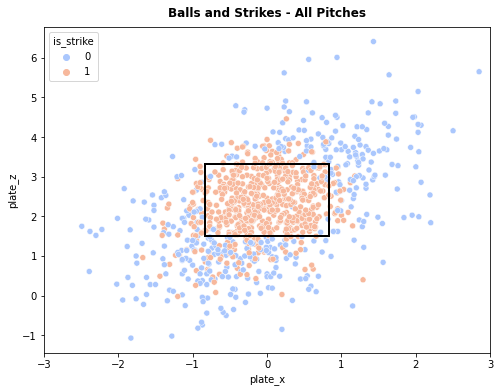

In [14]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = chapman, x = 'plate_x', y = 'plate_z', hue = 'is_strike', palette = 'coolwarm')
left, bottom, width, height = (-.83, 1.5, 1.66, 1.82)
rect = mpatches.Rectangle((left, bottom), width, height,
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.xlim(-3, 3)
plt.title('Balls and Strikes - All Pitches', fontdict = font_title, pad = 15);

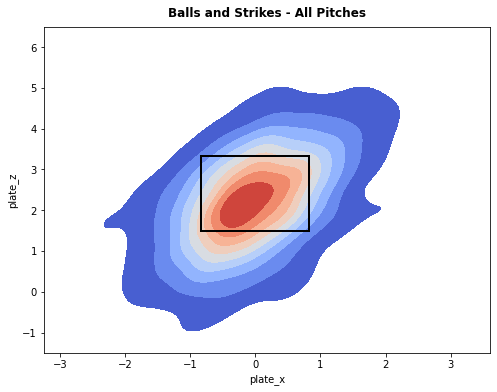

In [15]:
plt.figure(figsize = (8, 6))

sns.kdeplot(data = chapman, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
rect = mpatches.Rectangle((left, bottom), width, height,
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.ylim(-1.5, 6.5)
plt.title('Balls and Strikes - All Pitches', fontdict = font_title, pad = 15);

### Fastball Heatmaps

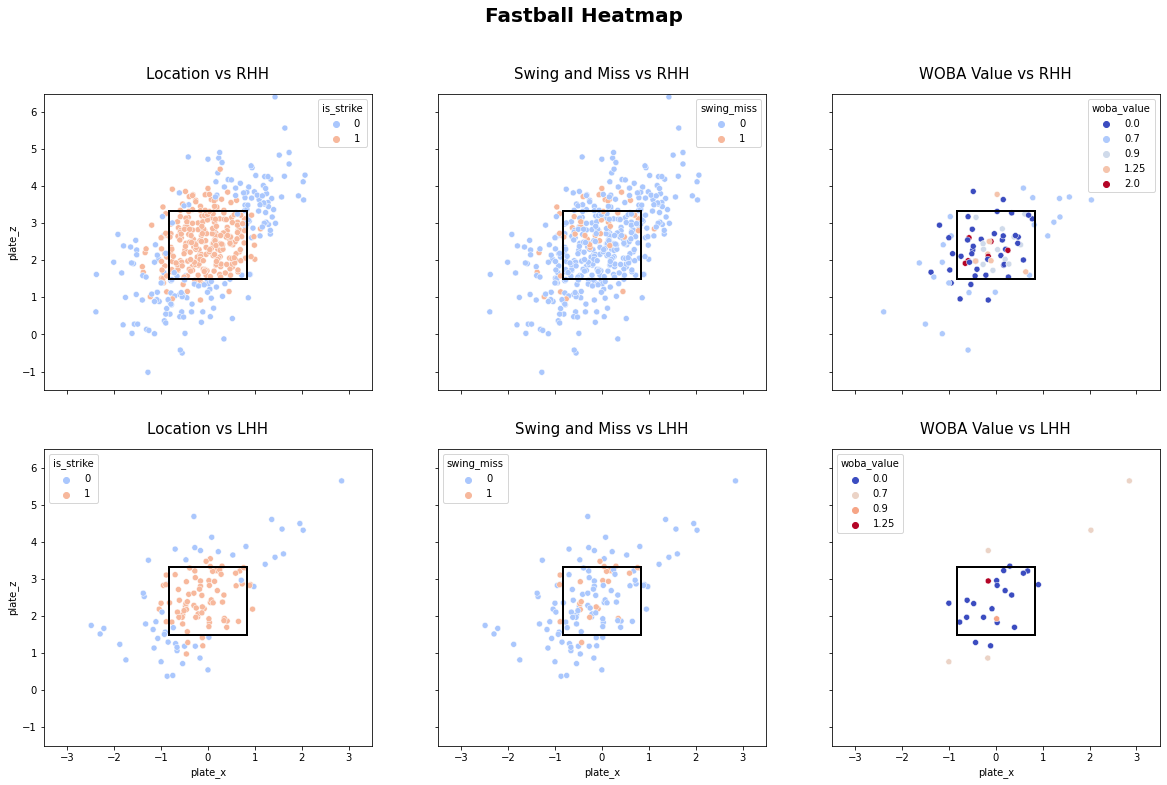

In [16]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Fastball Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 6.5)

sns.scatterplot(ax = axs[0][0],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHH', fontsize = 15, pad = 15);

### Fastball Heatmaps Cont.

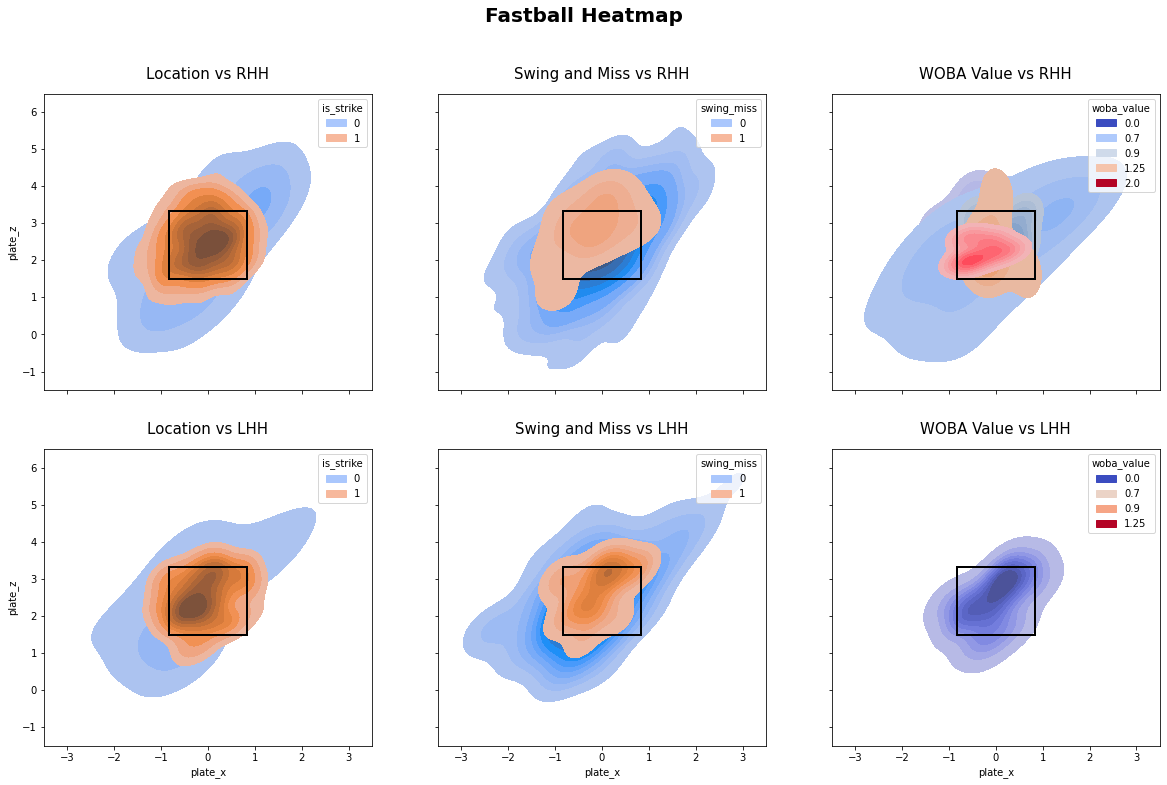

In [17]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Fastball Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 6.5)

sns.kdeplot(ax = axs[0][0], data = r_ff, x = 'plate_x', y = 'plate_z', fill = True,
            hue = 'is_strike', palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)

sns.kdeplot(ax = axs[0][1], data = r_ff, x = 'plate_x', y = 'plate_z', fill = True,
            hue = 'swing_miss', palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)

sns.kdeplot(ax = axs[0][2], data = r_ff, x = 'plate_x', y = 'plate_z', fill = True,
            hue = 'woba_value', palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHH', fontsize = 15, pad = 15)

sns.kdeplot(ax = axs[1][0], data = l_ff, x = 'plate_x', y = 'plate_z', fill = True,
            hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)

sns.kdeplot(ax = axs[1][1], data = l_ff,x = 'plate_x', y = 'plate_z', fill = True,
            hue = 'swing_miss', palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)

sns.kdeplot(ax = axs[1][2], data = l_ff, x = 'plate_x', y = 'plate_z', fill = True, 
            hue = 'woba_value', palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHH', fontsize = 15, pad = 15);

### Slider Heatmaps

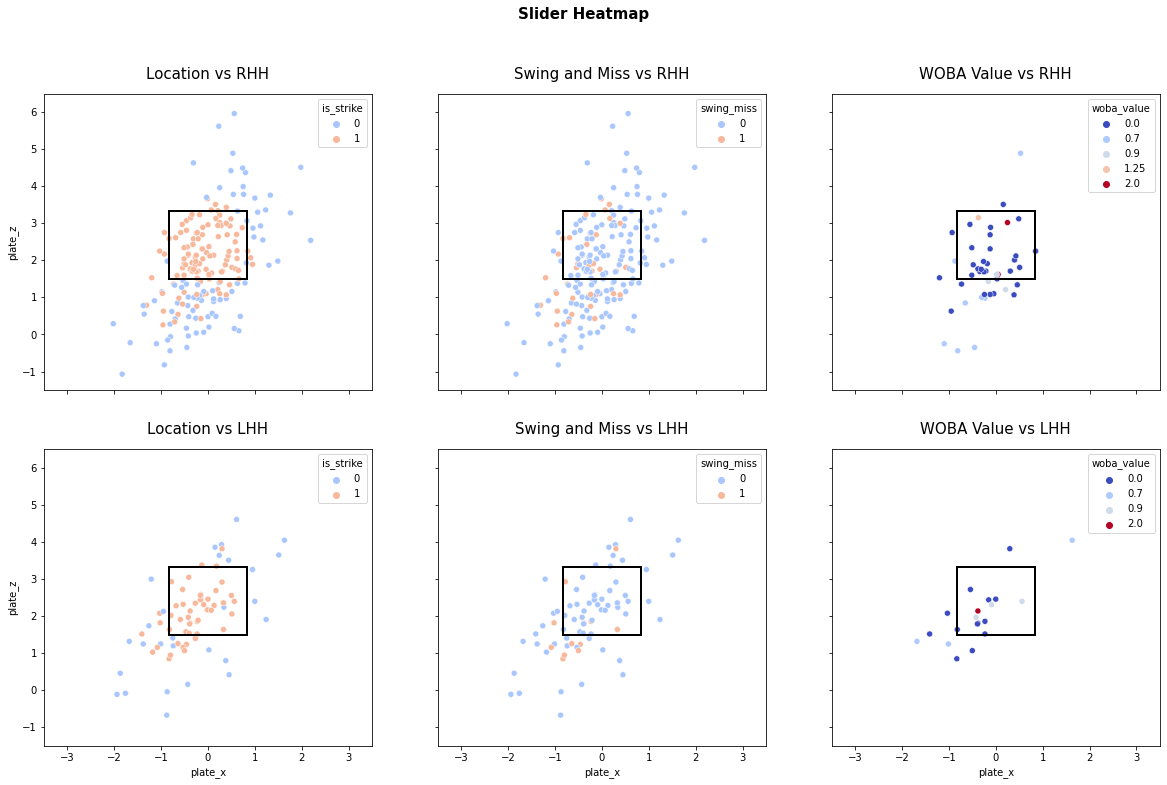

In [18]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Slider Heatmap', fontsize = 15, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 6.5)

sns.scatterplot(ax = axs[0][0],data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2], data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHH', fontsize = 15, pad = 15);

### Split-Finger Heatmaps

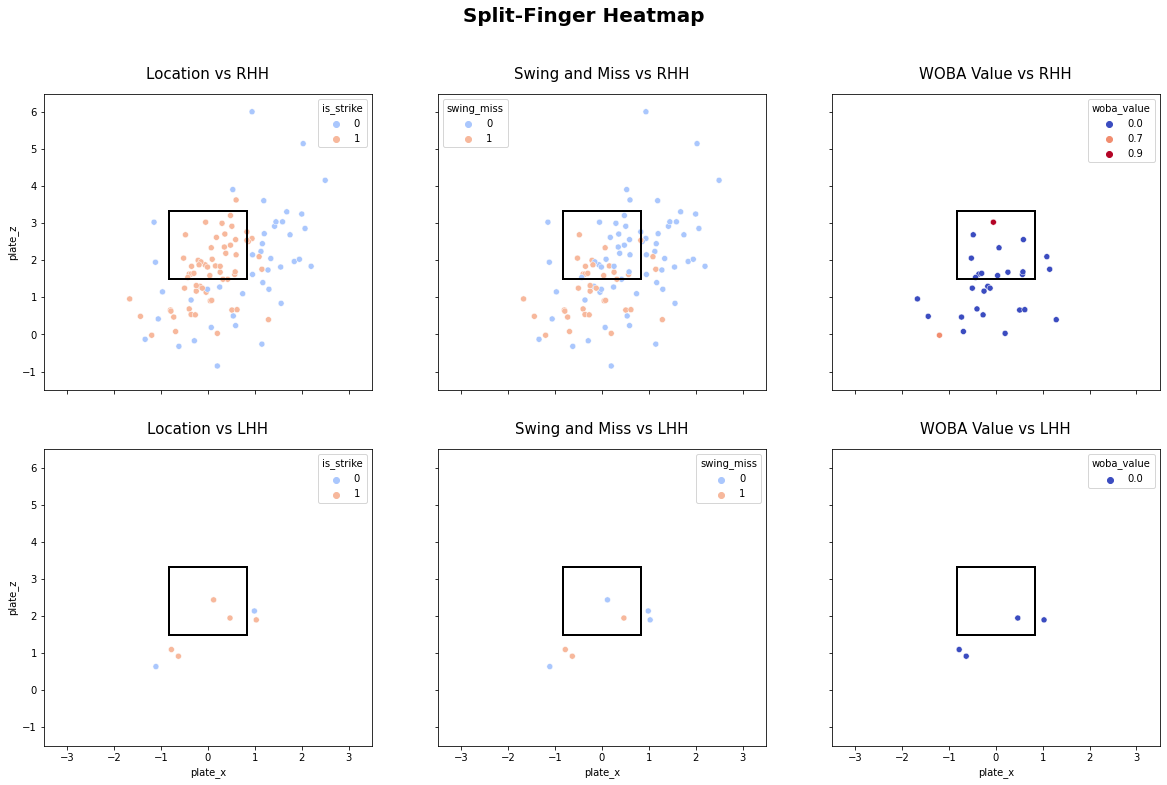

In [19]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Split-Finger Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 6.5)

sns.scatterplot(ax = axs[0][0],data = r_fs,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_fs,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2],data = r_fs,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_fs,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_fs,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_fs,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHH', fontsize = 15, pad = 15);

### Sinker Heatmaps

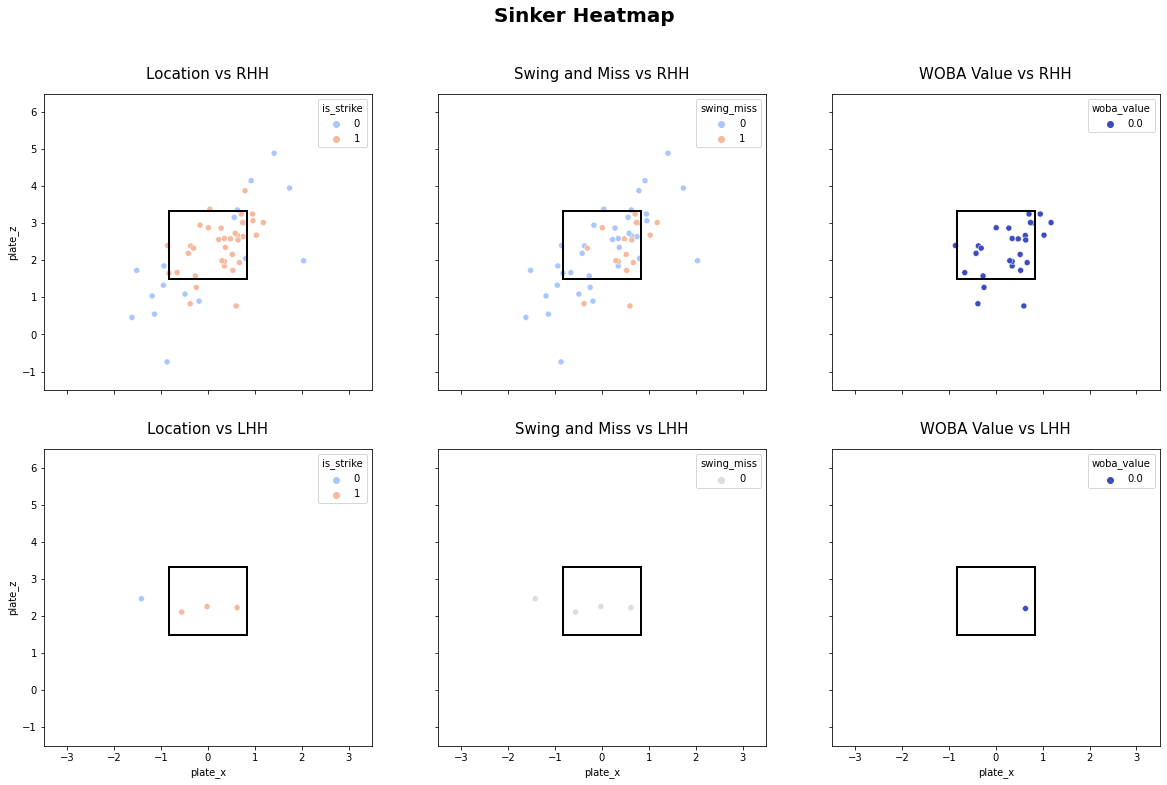

In [20]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Sinker Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 6.5)

sns.scatterplot(ax = axs[0][0],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHH', fontsize = 15, pad = 15);